# Análise de resíduos
Índice <a name="topo"></a>

1. [Padrão esperado de resíduos](#1)
2. [Padrão côncavo](#2)
3. [Padrão convexo](#3)
4. [Padrão de variância crescente](#4)
5. [Transformações em x](#5)
6. [Transformação na variável resposta](#6)

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.formula.api as smf
%matplotlib inline
plt.rc('figure', figsize=(6, 4))

### 1. Padrão esperado de resíduos<a name="1"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

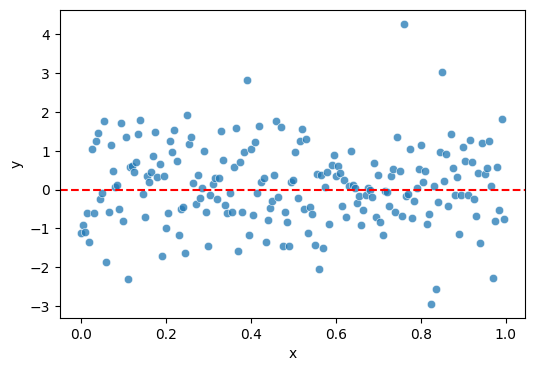

In [2]:
df = pd.DataFrame({'y':np.random.randn(200), 'x':np.arange(0,1,.005)})

sns.scatterplot(x = 'x', y = 'y', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

### 2. Padrão côncavo<a name="2"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

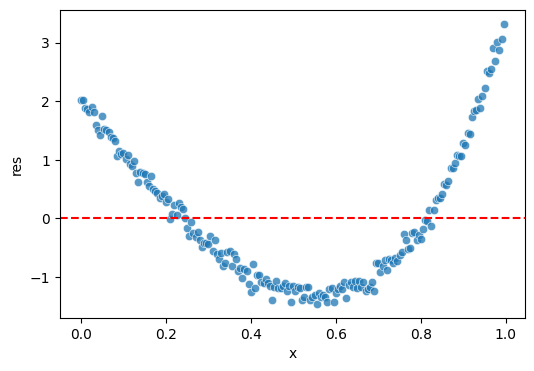

In [3]:
df['y'] = np.exp(2.5*(df['x']-(df['x'].min()-.1))) + np.random.randn(200)*.1
df['y'] = df['y'] - df['y'].mean()

reg = smf.ols('y ~ x', data = df).fit()
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='x', ylabel='y'>

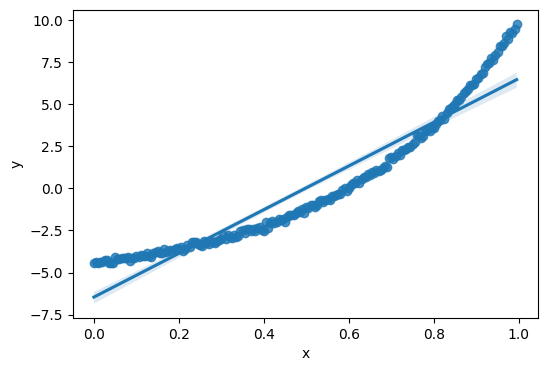

In [4]:
sns.regplot(x = 'x', y = 'y', data = df)

### 3. Padrão convexo<a name="3"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

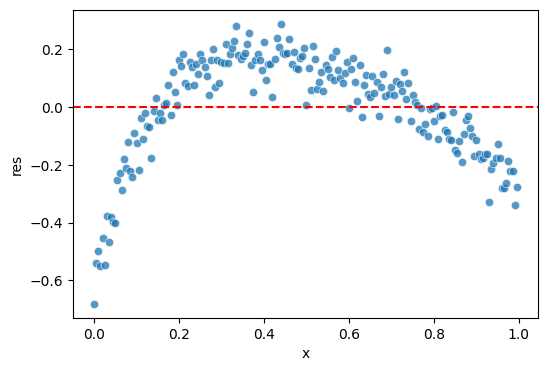

In [5]:
df['y'] = np.log((df['x']-(df['x'].min()-.1))) + np.random.randn(200)*.05
df['y'] = df['y'] - df['y'].mean()

reg = smf.ols('y ~ x', data = df).fit()
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')



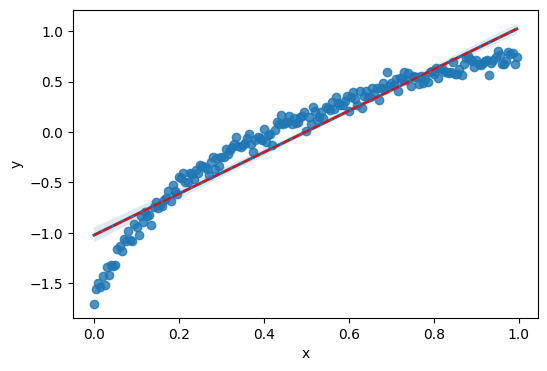

In [6]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], reg.fittedvalues, 'r,--')

### 4. Padrão de variância crescente<a name="4"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

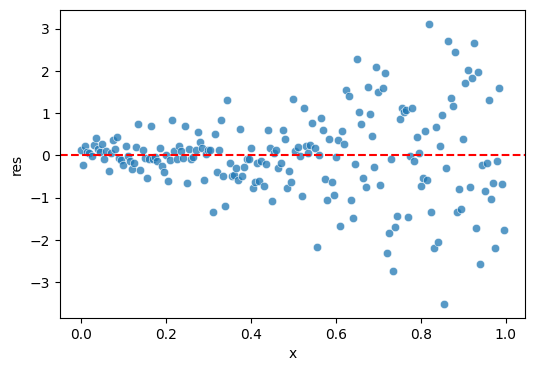

In [7]:
df['y'] = 5*(df['x']-(df['x'].min()-.1)) + (df['x']-(df['x'].min()-.1))*np.random.randn(200)*1.5

reg = smf.ols('y ~ x', data = df).fit()
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

<Axes: xlabel='x', ylabel='y'>

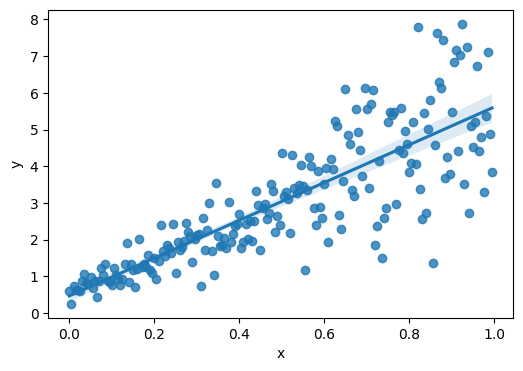

In [8]:
sns.regplot(x = 'x', y = 'y', data = df)

### 5. Transformações em x<a name="5"></a>
<div style="text-align: right"
     
[Voltar ao índice](#topo)</div>
    
Uma forma de buscar um melhor ajuste em uma regressão com padrão de relação não linear entre x e y é buscar uma função g(x) que linearize essa relação. Dentre as opções, podemos tentar:
- categorizar x
- ajustar um polinômio
- transformar por uma função log, exponencial, raiz etc.

<Axes: xlabel='x', ylabel='y'>

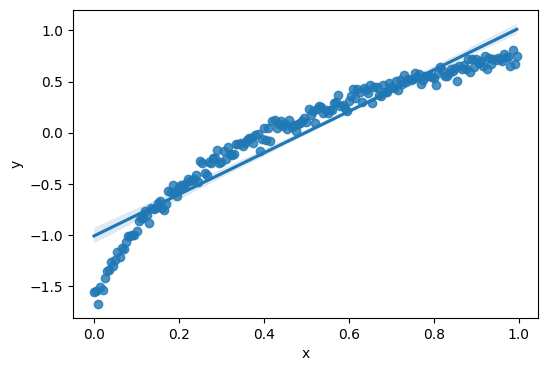

In [9]:
df['y'] = np.log((df['x']-(df['x'].min()-.1))) + np.random.randn(200)*.05
df['y'] = df['y'] - df['y'].mean()
sns.regplot(x = 'x', y = 'y', data = df)

A regressão com a variável ```x``` "crua" resulta em padrâo convexo nos resíduos

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     2057.
Date:                Wed, 12 Jun 2024   Prob (F-statistic):          1.52e-106
Time:                        21:33:05   Log-Likelihood:                 57.037
No. Observations:                 200   AIC:                            -110.1
Df Residuals:                     198   BIC:                            -103.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0106      0.026    -39.228      0.0

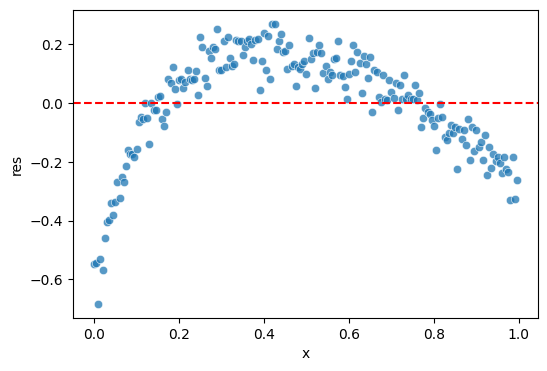

In [10]:
reg = smf.ols('y ~ x', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')


#### Ajustando um polinômio de segundo grau

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5707.
Date:                Wed, 12 Jun 2024   Prob (F-statistic):          4.10e-175
Time:                        21:33:27   Log-Likelihood:                 221.43
No. Observations:                 200   AIC:                            -436.9
Df Residuals:                     197   BIC:                            -427.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.3705      0.017    -80.

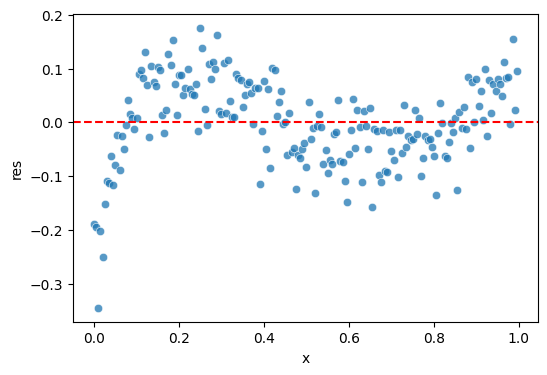

In [11]:
reg = smf.ols('y ~ x + np.power(x,2)', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

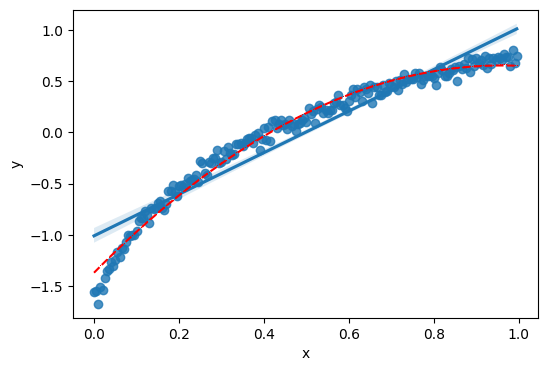

In [12]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], reg.fittedvalues, 'r,--')

#### Ajustando uma função exponencial

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1010.
Date:                Wed, 12 Jun 2024   Prob (F-statistic):           1.06e-79
Time:                        21:33:59   Log-Likelihood:                -5.3518
No. Observations:                 200   AIC:                             14.70
Df Residuals:                     198   BIC:                             21.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9608      0.064    -30.557      0.0

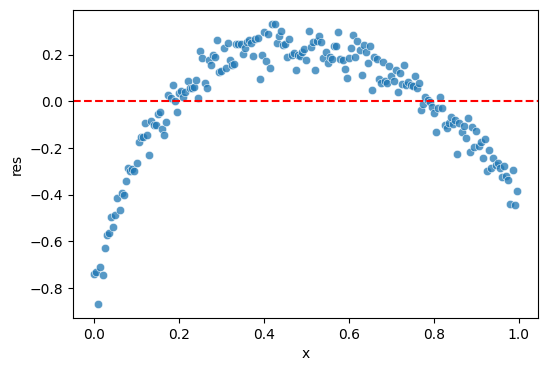

In [13]:
reg = smf.ols('y ~ np.exp(x)', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

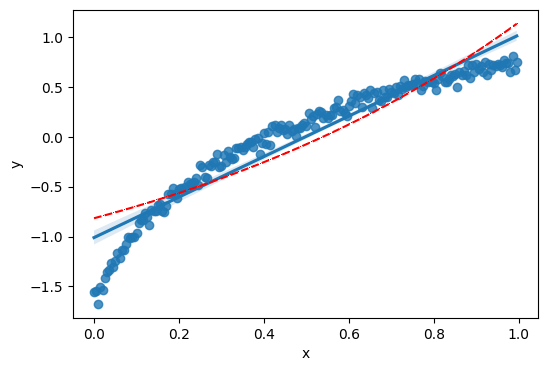

In [14]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], reg.fittedvalues, 'r,--')

#### Ajustando uma função logaritmica

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 3.041e+04
Date:                Wed, 12 Jun 2024   Prob (F-statistic):          1.05e-218
Time:                        21:34:14   Log-Likelihood:                 317.87
No. Observations:                 200   AIC:                            -631.7
Df Residuals:                     198   BIC:                            -625.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6724      0.005    128.

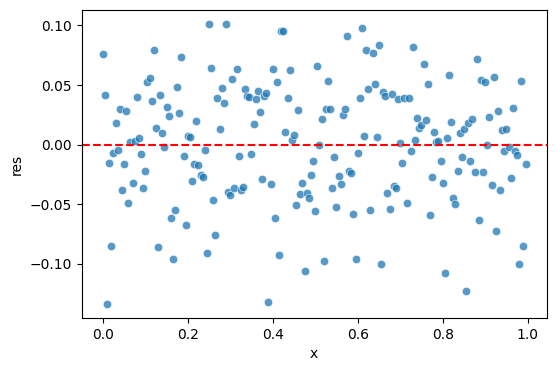

In [15]:
reg = smf.ols('y ~ np.log(x+.1)', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

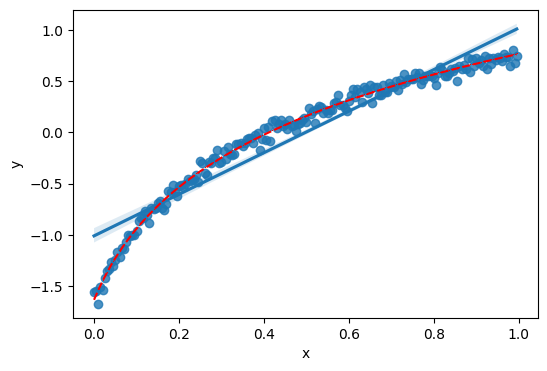

In [16]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], reg.fittedvalues, 'r,--')

### 6. Transformação na variável resposta<a name="6"></a>
<div style="text-align: right" 
     
[Voltar ao índice](#topo)

<Axes: xlabel='x', ylabel='y'>

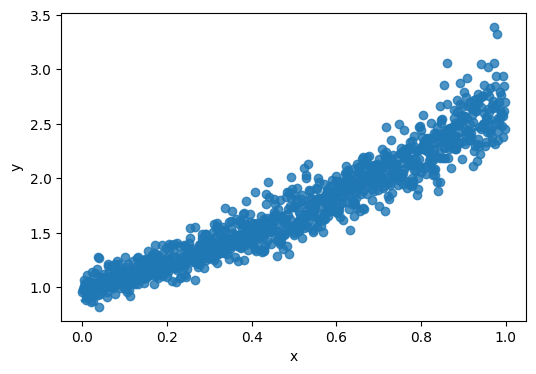

In [17]:
x = np.arange(0,1,.001)
df = pd.DataFrame({'y':np.exp(x + np.random.randn(1000)*.08), 'x':x})

sns.regplot(x = 'x', y = 'y', data = df)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 1.032e+04
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:34:33   Log-Likelihood:                 463.52
No. Observations:                1000   AIC:                            -923.0
Df Residuals:                     998   BIC:                            -913.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8759      0.010     90.957      0.0

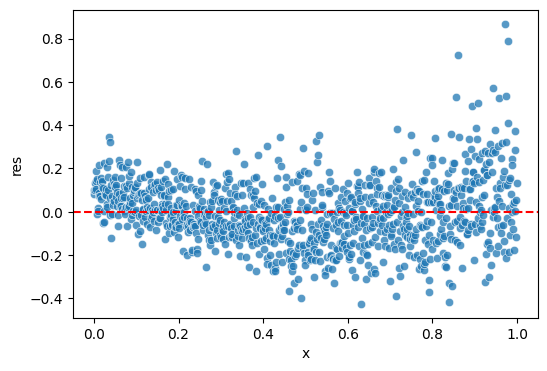

In [18]:
reg = smf.ols('y ~ x', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [20]:
# outra forma de calcular o R^2
df['pred'] = reg.fittedvalues

r = df[['pred', 'y']].corr().iloc[0,1]

In [21]:
r**2

0.9118270216485005

#### Log na variável resposta usando o Patsy

                            OLS Regression Results                            
Dep. Variable:              np.log(y)   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 1.385e+04
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:34:57   Log-Likelihood:                 1135.3
No. Observations:                1000   AIC:                            -2267.
Df Residuals:                     998   BIC:                            -2257.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0018      0.005     -0.366      0.7

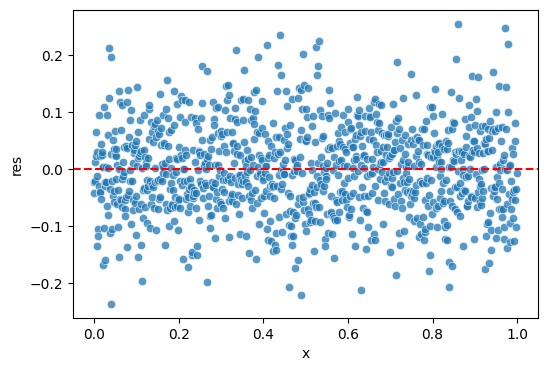

In [22]:
reg = smf.ols('np.log(y) ~ x', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

#### Por que não posso comparar o R^2 desse modelo com o primeiro?

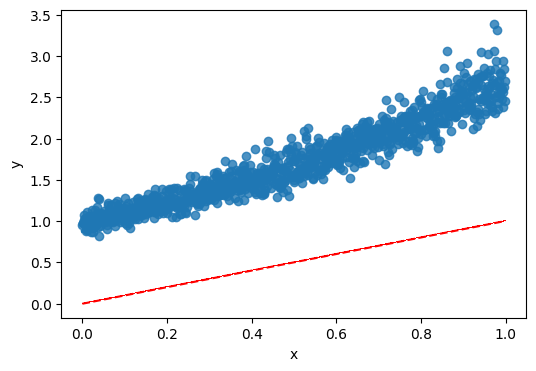

In [23]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], reg.fittedvalues, 'r,--')

#### Então como eu calculo o R^2 no dado original?

In [24]:
df['pred_y'] = np.exp(reg.fittedvalues)

df[['pred_y', 'y']].corr().iloc[0,1]**2

0.9243316633361364

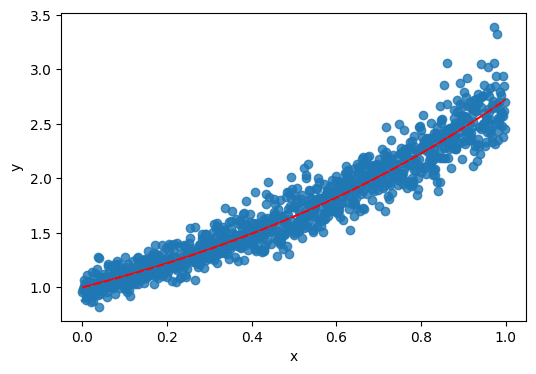

In [25]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], df['pred_y'], 'r,--')